In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Paleta de cores do carnaval
my_palette = sns.color_palette(['#0455BF', '#05C7F2', '#D95204'])

In [3]:
df=pd.read_csv('C:/Users/gabri/Downloads/df_carnaval.csv')

In [4]:
df=df.rename(columns={'t_outromoivo':'t_outro_motivo'})

In [5]:
maiores_blocos = ['Baianas Ozadas', 'MONOBLOCO', 'Entao Brilha', 'Bloco Despedida de Carnaval']
tamanho_metade = int(df.shape[0]/2)
menores_blocos = list(df['bloco'].sort_values()[:tamanho_metade].index)
df['bloco_classificacao'] = df['bloco']
df.loc[~df['bloco_classificacao'].isin(maiores_blocos + menores_blocos), 'bloco_classificacao'] = 'Outros'


In [6]:
coluna_a = df.pop('bloco_classificacao') # remove a coluna do DataFrame e a armazena em uma variável separada
df.insert(4, 'bloco_classificacao', coluna_a) # insere a coluna na posição 2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1645 non-null   int64  
 1   morador                     1645 non-null   object 
 2   numero_controle             1645 non-null   int64  
 3   bloco                       1645 non-null   object 
 4   bloco_classificacao         1645 non-null   object 
 5   dt_visita                   1645 non-null   object 
 6   dt_termino                  1645 non-null   object 
 7   tempo_total_entrev          1645 non-null   object 
 8   idade                       1645 non-null   int64  
 9   pais                        1645 non-null   object 
 10  estado                      1640 non-null   object 
 11  cidade                      1640 non-null   object 
 12  bairro_bh                   1135 non-null   object 
 13  regiao_bh                   1135 

In [8]:
df['escolaridade'].unique()

array(['Ensino superior completo', 'Pos – Graduaçao – Mestrado',
       'Ensino superior incompleto', 'Ensino medio completo',
       'Ensino fundamental incompleto', 'Ensino medio incompleto',
       'Ensino tecnico', 'Pos – Graduaçao – Especializaçao',
       'Pos – Graduaçao – Doutorado', 'Ensino fundamental completo',
       'Nao respondeu'], dtype=object)

In [9]:
df.describe()

,Unnamed: 0,numero_controle,idade,t_qtpernoite,dias_carnaval,gasto_total,t_hospedagem.1,alimentacao,t_atrativos_passeios,transporte_interno,compras,ingressos,outros,total,qtd_pessoas_gasto,aval_geral,aval_banheiros,aval_seguranca,aval_precos
count,1645.000000,1645.000000,1645.000000,210.000000,1645.000000,1623.000000,40.000000,1559.000000,181.000000,1191.000000,513.000000,102.000000,244.000000,1622.000000,1644.000000,1615.000000,1641.000000,1638.000000,1644.000000
mean,822.000000,823.000000,30.454103,6.328571,3.843769,359.009673,737.125000,205.440026,266.585635,73.486146,94.497076,138.715686,130.500000,357.203884,1.524331,5.191331,7.170628,6.669109,8.339416
std,475.014912,475.014912,11.690186,12.878588,1.664509,891.222926,1183.686055,253.240412,1519.026175,89.688319,161.262162,158.155167,266.857609,894.586091,1.055959,2.607524,2.221050,2.217366,1.379929
min,0.000000,1.000000,16.000000,1.000000,1.000000,3.000000,40.000000,2.000000,4.000000,4.000000,1.000000,10.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,411.000000,412.000000,22.000000,4.000000,2.000000,115.000000,230.000000,70.000000,50.000000,25.000000,20.000000,40.000000,30.000000,106.500000,1.000000,3.000000,6.000000,5.000000,8.000000
50%,822.000000,823.000000,27.000000,4.000000,4.000000,230.000000,340.000000,150.000000,100.000000,50.000000,50.000000,100.000000,50.000000,220.000000,1.000000,5.000000,8.000000,7.000000,8.000000
75%,1233.000000,1234.000000,37.000000,6.000000,5.000000,403.500000,600.000000,250.000000,200.000000,100.000000,100.000000,153.000000,100.000000,400.000000,2.000000,7.000000,9.000000,8.000000,9.000000
max,1644.000000,1645.000000,74.000000,180.000000,6.000000,31201.000000,6820.000000,5000.000000,20460.000000,1500.000000,2000.000000,1000.000000,2500.000000,31201.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
# Criando outra coluna para classificar a renda:
df['faixa_renda'].value_counts()

de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)     287
de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)      257
de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)     246
de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)     193
de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)     137
Acima de 10 salarios (acima de R$ 9540,00)      135
de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)     100
Ate um salario minimo (R$ 954,00 )               66
de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)      64
de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)     56
de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)      40
Nao respondeu                                    34
Nao sabe                                         30
Name: faixa_renda, dtype: int64

In [11]:
df=df.drop(df[df['faixa_renda']=='Nao respondeu'].index)
df=df.drop(df[df['faixa_renda']=='Nao sabe'].index)
df=df.reset_index()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       1581 non-null   int64  
 1   Unnamed: 0                  1581 non-null   int64  
 2   morador                     1581 non-null   object 
 3   numero_controle             1581 non-null   int64  
 4   bloco                       1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   dt_visita                   1581 non-null   object 
 7   dt_termino                  1581 non-null   object 
 8   tempo_total_entrev          1581 non-null   object 
 9   idade                       1581 non-null   int64  
 10  pais                        1581 non-null   object 
 11  estado                      1577 non-null   object 
 12  cidade                      1577 non-null   object 
 13  bairro_bh                   1090 

In [13]:
# Dicionário com os intervalos e seus respectivos valores inteiros
intervalos = {
    'Ate um salario minimo (R$ 954,00 )': 1,
    'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': 2,
    'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': 3,
    'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': 4,
    'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': 5,
    'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': 6,
    'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': 7,
    'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': 8,
    'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': 9,
    'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': 10,
    'Acima de 10 salarios (acima de R$ 9540,00)': 11
}
df['faixa_renda']=df['faixa_renda'].astype(str)
df['int_renda'] = df['faixa_renda'].apply(lambda x: intervalos[x])




In [14]:
# CHECANDO OS NULOS

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       1581 non-null   int64  
 1   Unnamed: 0                  1581 non-null   int64  
 2   morador                     1581 non-null   object 
 3   numero_controle             1581 non-null   int64  
 4   bloco                       1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   dt_visita                   1581 non-null   object 
 7   dt_termino                  1581 non-null   object 
 8   tempo_total_entrev          1581 non-null   object 
 9   idade                       1581 non-null   int64  
 10  pais                        1581 non-null   object 
 11  estado                      1577 non-null   object 
 12  cidade                      1577 non-null   object 
 13  bairro_bh                   1090 

In [16]:
df[df['t_hospedagem'].isnull()][df['morador']=='Visitantes']

C:\Users\gabri\AppData\Local\Temp\ipykernel_13292\1416726384.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['t_hospedagem'].isnull()][df['morador']=='Visitantes']


,index,Unnamed: 0,morador,numero_controle,bloco,bloco_classificacao,dt_visita,dt_termino,tempo_total_entrev,idade,...,t_visita_cultural,t_compras,t_gastronomia,principal_patrocinador,outro_patrocinador,genero,escolaridade,estado_civil,faixa_renda,int_renda
49,49,49,Visitantes,50,Entao Brilha,Entao Brilha,2018-02-10 06:27:00,2018-02-10 06:39:00,0 days 00:11:31,25,...,False,False,False,Skol,NaN,Masculino,Ensino superior incompleto,Solteiro (a),"de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)",6
59,61,61,Visitantes,62,Entao Brilha,Entao Brilha,2018-02-10 06:56:00,2018-02-10 07:02:00,0 days 00:06:30,24,...,False,False,False,Prefeitura,NaN,Feminino,Ensino superior incompleto,Solteiro (a),"de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)",2
85,88,88,Visitantes,89,Entao Brilha,Entao Brilha,2018-02-10 07:56:00,2018-02-10 08:05:00,0 days 00:08:53,37,...,False,False,False,Skol,Skol,Feminino,Ensino superior completo,Solteiro (a),"de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)",4
87,90,90,Visitantes,91,Entao Brilha,Entao Brilha,2018-02-10 07:59:00,2018-02-10 08:12:00,0 days 00:13:02,26,...,False,False,False,Nao sabe,NaN,Feminino,Pos – Graduaçao – Especializaçao,Casado (a),"Acima de 10 salarios (acima de R$ 9540,00)",11
119,123,123,Visitantes,124,Entao Brilha,Entao Brilha,2018-02-10 08:51:00,2018-02-10 08:59:00,0 days 00:08:18,30,...,False,False,False,Skol,Ambev,Masculino,Pos – Graduaçao – Especializaçao,Solteiro (a),"de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)",9
161,165,165,Visitantes,166,Entao Brilha,Entao Brilha,2018-02-10 10:24:00,2018-02-10 10:34:00,0 days 00:09:48,52,...,False,False,False,Skol,Prefeitura,Masculino,Ensino superior completo,Casado (a),"de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)",7
282,290,290,Visitantes,291,Quando come se lambuza,Outros,2018-02-10 17:56:00,2018-02-10 18:00:00,0 days 00:03:49,41,...,False,False,False,Prefeitura,Skol,Masculino,Ensino medio completo,Solteiro (a),"de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)",2
329,340,340,Visitantes,341,Alo Abacaxi,Outros,2018-02-11 10:05:00,2018-02-11 10:14:00,0 days 00:08:57,37,...,False,False,False,Skol,Prefeitura,Feminino,Pos – Graduaçao – Doutorado,Solteiro (a),"Acima de 10 salarios (acima de R$ 9540,00)",11
439,452,452,Visitantes,453,Bloco Angola Janga,Outros,2018-02-11 17:35:00,2018-02-11 17:39:00,0 days 00:04:12,39,...,False,False,False,Nao sabe,NaN,Feminino,Ensino medio completo,Solteiro (a),"Ate um salario minimo (R$ 954,00 )",1
499,514,514,Visitantes,515,Baianas Ozadas,Baianas Ozadas,2018-02-12 08:59:00,2018-02-12 09:04:00,0 days 00:04:42,36,...,False,False,False,Prefeitura,NaN,Masculino,Ensino superior completo,Solteiro (a),"de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)",3


In [17]:
df.loc[df['morador'] == 'Visitantes', 't_qtpernoite'] = df.loc[df['morador'] == 'Visitantes', 't_qtpernoite'].fillna(0)


In [18]:
df['t_hospedagem'].unique()

array([nan, 'Casa de Amigos/Parentes', 'Casa propria/alugada',
       'Hoteis/Pousadas', 'Outro   airbnb', 'Outro   carro',
       'Outro   aluguel de quarto', 'Albergue', 'Outro   flat'],
      dtype=object)

In [19]:
df.loc[df['morador'] == 'Visitantes', 't_pernoite'] = df.loc[df['morador'] == 'Visitantes', 't_pernoite'].fillna(0)


In [20]:
df.loc[df['morador'] == 'Visitantes', 't_hospedagem'] = df.loc[df['morador'] == 'Visitantes', 't_hospedagem'].fillna('Outros')

In [21]:
df['t_transp'][df['morador']=='Visitantes'].unique()
df.loc[df['morador'] == 'Visitantes', 't_transp'] = df.loc[df['morador'] == 'Visitantes', 't_transp'].fillna('Outros')

In [22]:
df.loc[df['morador'] == 'Visitantes', 't_motivo'] = df.loc[df['morador'] == 'Visitantes', 't_motivo'].fillna('Nao respondeu')

In [23]:
df.loc[df['morador'] == 'Visitantes', 't_outro_motivo'] = df.loc[df['morador'] == 'Visitantes', 't_outro_motivo'].fillna('Nao respondeu')

In [24]:
def fill_gasto_total(row):
    if pd.isna(row['gasto_total']):
        return df['gasto_total'][row['dias_carnaval']]
    return row['gasto_total']        
df['gasto_total'] = df.apply(fill_gasto_total, axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       1581 non-null   int64  
 1   Unnamed: 0                  1581 non-null   int64  
 2   morador                     1581 non-null   object 
 3   numero_controle             1581 non-null   int64  
 4   bloco                       1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   dt_visita                   1581 non-null   object 
 7   dt_termino                  1581 non-null   object 
 8   tempo_total_entrev          1581 non-null   object 
 9   idade                       1581 non-null   int64  
 10  pais                        1581 non-null   object 
 11  estado                      1577 non-null   object 
 12  cidade                      1577 non-null   object 
 13  bairro_bh                   1090 

In [26]:
df['t_hospedagem'][df['morador']=='Visitantes'][df['t_hospedagem.1'].isnull()]

12      Casa de Amigos/Parentes
37      Casa de Amigos/Parentes
49                       Outros
54         Casa propria/alugada
58      Casa de Amigos/Parentes
                 ...           
1536    Casa de Amigos/Parentes
1560    Casa de Amigos/Parentes
1567    Casa de Amigos/Parentes
1569    Casa de Amigos/Parentes
1580    Casa de Amigos/Parentes
Name: t_hospedagem, Length: 179, dtype: object

In [27]:
df[['alimentacao', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']]=df[['alimentacao', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']].fillna(0)

In [28]:
df['qtd_pessoas_gasto']=df['qtd_pessoas_gasto'].fillna(1) 

In [29]:
df.loc[df['morador'] == 'Visitantes', ['t_hospedagem.1', 't_atrativos_passeios']] = df.loc[df['morador'] == 'Visitantes', ['t_hospedagem.1', 't_atrativos_passeios']].fillna(0)

In [30]:
df[['evolucao', 'motivo']]=df[['evolucao', 'motivo']].fillna('Nao respondeu')

In [31]:
df['motivo_nao']=df['motivo_nao'].fillna('Retornara')

In [32]:
df['outro_patrocinador']=df['outro_patrocinador'].fillna('Nao possui')

In [33]:
faixas_preco=[0,500,1000,5000,float('inf')]
categoria=['Baixo', 'Médio', 'Alto', 'Muito alto']
df['nivel_gastos']=pd.cut(df['gasto_total'], bins=faixas_preco, labels=categoria)

In [34]:
df['escolaridade'].unique()

array(['Ensino superior completo', 'Pos – Graduaçao – Mestrado',
       'Ensino superior incompleto', 'Ensino medio completo',
       'Ensino fundamental incompleto', 'Ensino medio incompleto',
       'Ensino tecnico', 'Pos – Graduaçao – Especializaçao',
       'Pos – Graduaçao – Doutorado', 'Ensino fundamental completo',
       'Nao respondeu'], dtype=object)

In [35]:
def categoriza_escolaridade(x):
    if x in ['Ensino fundamental incompleto', 'Ensino fundamental completo', 'Ensino medio incompleto', 'Ensino medio completo']:
        return 'Ensino Básico'
    elif x in ['Ensino superior completo', 'Ensino superior incompleto', 'Ensino tecnico']:
        return 'Graduado'
    elif x in ['Pos – Graduaçao – Mestrado', 'Pos – Graduaçao – Especializaçao', 'Pos – Graduaçao – Doutorado', 'MBA']:
        return 'Pós'
    else:
        return 'Outros'
    
df['categoria_escolaridade'] = df['escolaridade'].apply(categoriza_escolaridade)

In [36]:
df['t_transp'].unique()

array([nan, 'Aviao', 'onibus rodoviario', 'Outros', 'Carro',
       'Outro   Carona', 'Trem', 'Outro   Uber', 'Taxi'], dtype=object)

In [37]:
def categoriza_transporte(x):
    if x in ['Aviao', 'onibus rodoviario', 'Trem']:
        return 'Transporte Coletivo'
    elif x in ['Carro', 'Outro   Carona']:
        return 'Transporte Privado'
    elif x in ['Outro   Uber', 'Taxi']:
        return 'Aplicativo'
    
df['categoria_transporte'] = df['t_transp'].apply(categoriza_transporte)

In [38]:
def categoria_hospedagem(x):
    if x in ['Albergue', 'Outro   flat', 'Hoteis/Pousadas']:
        return 'Hospedagem'
    elif x in ['Outro   airbnb', 'Outro   aluguel de quarto']:
        return 'Airbnb'
    elif x in ['Casa de Amigos/Parentes', 'Casa propria/alugada']:
        return 'Casa'
    else:
        return 'Outros'
df['categoria_hospedagem'] = df['t_hospedagem'].apply(categoria_hospedagem)


In [39]:
df['morador']

0          Morador
1          Morador
2          Morador
3          Morador
4          Morador
           ...    
1576       Morador
1577       Morador
1578       Morador
1579       Morador
1580    Visitantes
Name: morador, Length: 1581, dtype: object

In [40]:
df.loc[df['morador'] == 'Morador', ['bairro_bh', 'regiao_bh']] = df.loc[df['morador'] == 'Morador', ['bairro_bh', 'regiao_bh']].fillna('Desconhecido')

In [41]:
def categoria_regiao(x):
    if x in ['Minas Gerais', 'Sao Paulo', 'Rio de Janeiro', 'Espirito Santo']:
        return 'Sudeste'
    elif x in ['Mato Grosso do Sul', 'Goias']:
        return 'Centro-Oeste'
    elif x in ['Pernambuco', 'Maranhao', 'Rio Grande do Norte', 'Bahia', 'Ceara']:
        return 'Nordeste'
    elif x in ['Rio Grande do Sul', 'Santa Catarina', 'Parana']:
        return 'Sul'
    elif x in ['Amazonas']:
        return 'Norte'
df['categoria_regiao'] = df['estado'].apply(categoria_regiao)

In [42]:
df['categoria_regiao']=df['categoria_regiao'].fillna('Desconhecido/Inter')

In [43]:
df.loc[df['morador'] == 'Visitantes', 'categoria_transporte'] = df.loc[df['morador'] == 'Visitantes', 'categoria_transporte'].fillna('Outros')


In [44]:
df[['estado', 'cidade']]=df[['estado', 'cidade']].fillna('Inter')

In [45]:
avals=['aval_geral', 'aval_banheiros', 'aval_seguranca', 'aval_precos']
for i in avals:
    df[i]=df[i].fillna(df[i].median())


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   index                       1581 non-null   int64   
 1   Unnamed: 0                  1581 non-null   int64   
 2   morador                     1581 non-null   object  
 3   numero_controle             1581 non-null   int64   
 4   bloco                       1581 non-null   object  
 5   bloco_classificacao         1581 non-null   object  
 6   dt_visita                   1581 non-null   object  
 7   dt_termino                  1581 non-null   object  
 8   tempo_total_entrev          1581 non-null   object  
 9   idade                       1581 non-null   int64   
 10  pais                        1581 non-null   object  
 11  estado                      1581 non-null   object  
 12  cidade                      1581 non-null   object  
 13  bairro_bh         

In [47]:
# Comparando gastos financeiros com características pessoais.
financeiro=['int_renda','gasto_total', 't_hospedagem.1', 'alimentacao', 't_atrativos_passeios', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']
pessoal=['idade', 'aval_geral', 'aval_banheiros', 'aval_seguranca', 'aval_precos']

In [48]:
df.corr().loc[financeiro, pessoal]

,idade,aval_geral,aval_banheiros,aval_seguranca,aval_precos
int_renda,0.111156,-0.021273,0.032325,0.141882,-0.006964
gasto_total,0.049281,-0.069643,0.052113,0.115021,0.028324
t_hospedagem.1,0.071481,-0.162523,0.074958,0.022498,-0.296854
alimentacao,0.047047,-0.030498,0.041357,0.112095,0.086580
t_atrativos_passeios,0.060464,-0.106869,-0.035037,0.055591,-0.103041
transporte_interno,0.056136,-0.041464,-0.021815,0.038745,0.020050
compras,0.058425,-0.020453,0.062674,0.092075,0.059206
ingressos,-0.041746,-0.048186,-0.000764,0.036795,0.002124
outros,0.067911,-0.045972,-0.011180,0.039547,-0.033499
total,0.056248,-0.064628,0.053156,0.119565,0.034001


<AxesSubplot:>

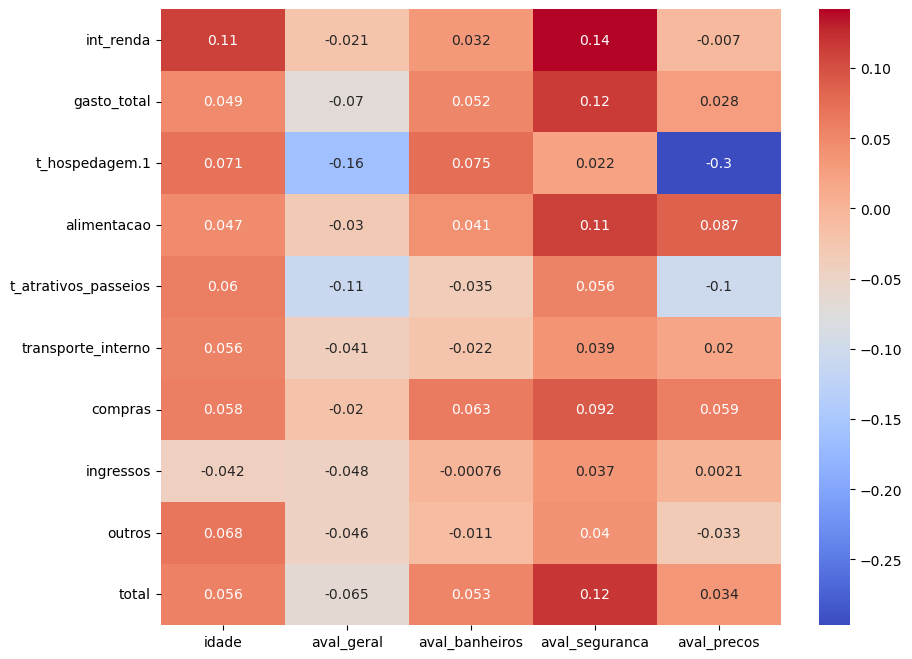

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr().loc[financeiro, pessoal], annot=True, cmap='coolwarm', ax=ax)


In [50]:
#Quanto maior os gastos, menor a avaliação geral

In [51]:
renda=df.pivot_table(index=['int_renda', 'genero'], values='aval_geral', aggfunc='mean')

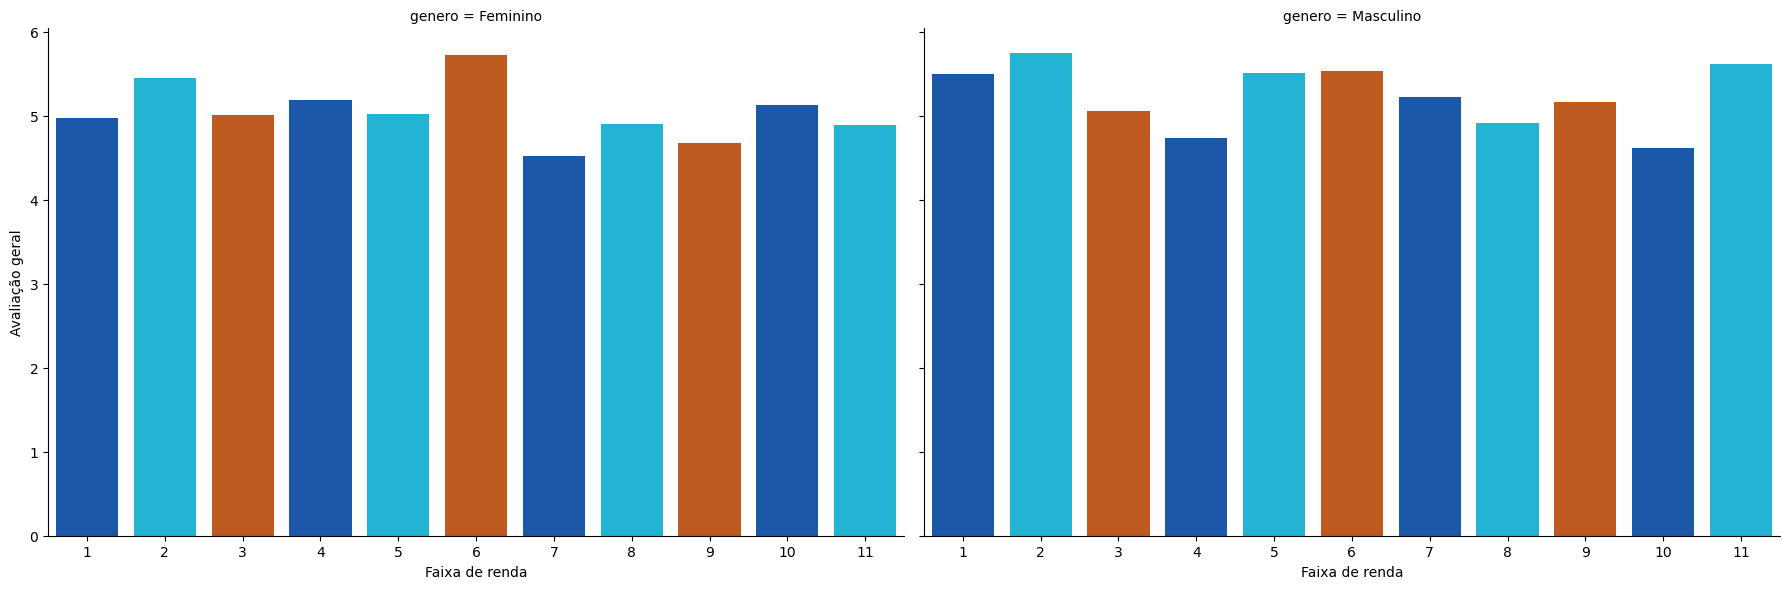

In [52]:

g = sns.catplot(x='int_renda', y='aval_geral', kind='bar', data=df, col='genero', ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Faixa de renda', 'Avaliação geral')

plt.show()


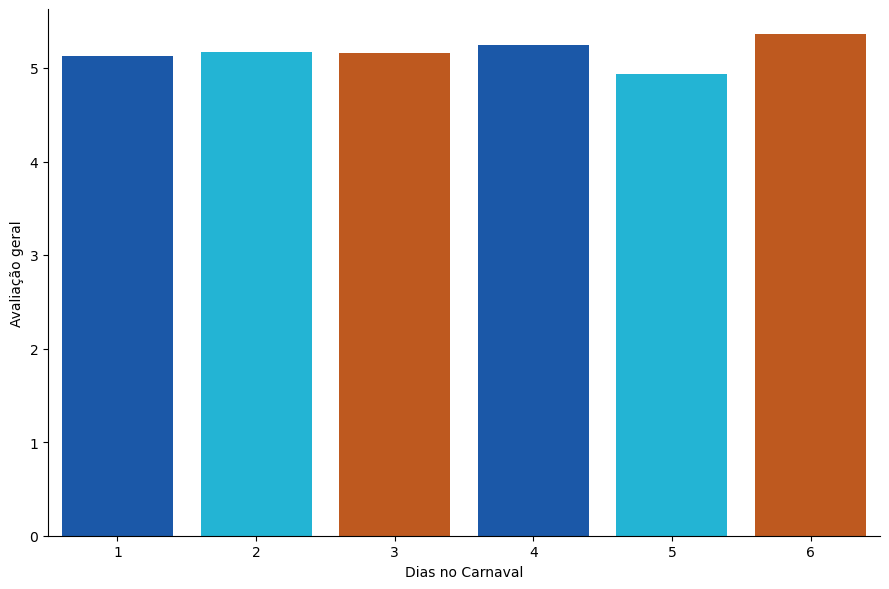

In [53]:
g = sns.catplot(x='dias_carnaval', y='aval_geral', kind='bar', data=df, ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Dias no Carnaval', 'Avaliação geral')


In [54]:
blocos=df.pivot_table(index='bloco', values='aval_geral', aggfunc='mean')

In [55]:
blocos

,aval_geral
bloco,
Alo Abacaxi,5.290323
Baianas Ozadas,5.106870
Batiza,5.611111
Beiço do Vando,6.558824
Bloco Angola Janga,4.590164
Bloco Despedida de Carnaval,5.860870
Bloco Havayanas Usadas,7.035714
Bloco da Calixto,5.137931
Bloco e o Amo,5.333333


In [56]:
# Criando a tabela com número de pessoas por estado civil e calculando o percentual do total de cada um
estado_civil = df.groupby('estado_civil', as_index=False).agg({'numero_controle':'nunique'})
estado_civil.columns = ['estado_civil', 'quantidade']
estado_civil['percentual_do_total'] = (estado_civil['quantidade']/estado_civil['quantidade'].sum())*100
estado_civil

,estado_civil,quantidade,percentual_do_total
0,Casado (a),309,19.544592
1,Divorciado (a),72,4.554080
2,Outro,11,0.695762
3,Solteiro (a),1174,74.256799
4,Viuvo (a),15,0.948767


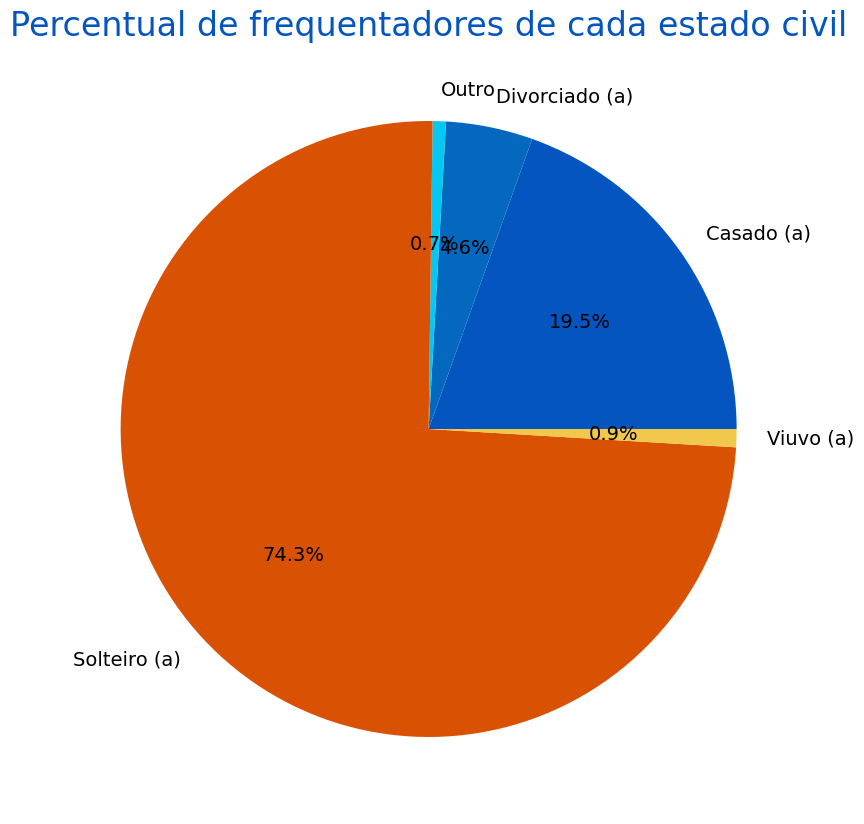

In [57]:
plt.figure(figsize=(12,10))
plt.pie(estado_civil['quantidade'], labels=estado_civil['estado_civil'].unique(), autopct='%1.1f%%', colors=['#0455BF', '#0468BF', '#05C7F2', '#D95204', '#F2C84C'], textprops={'fontsize': 14})
plt.title("Percentual de frequentadores de cada estado civil", fontsize=24 , color='#0455BF')
plt.show()

In [58]:
aval_renda = df.groupby('faixa_renda', as_index=False).agg({'aval_geral':'mean'})
aval_renda

,faixa_renda,aval_geral
0,"Acima de 10 salarios (acima de R$ 9540,00)",5.318519
1,"Ate um salario minimo (R$ 954,00 )",5.196970
2,"de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)",5.579767
3,"de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)",5.027875
4,"de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)",4.991870
5,"de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)",5.212435
6,"de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)",5.627737
7,"de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)",4.860000
8,"de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)",4.906250
9,"de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)",4.900000


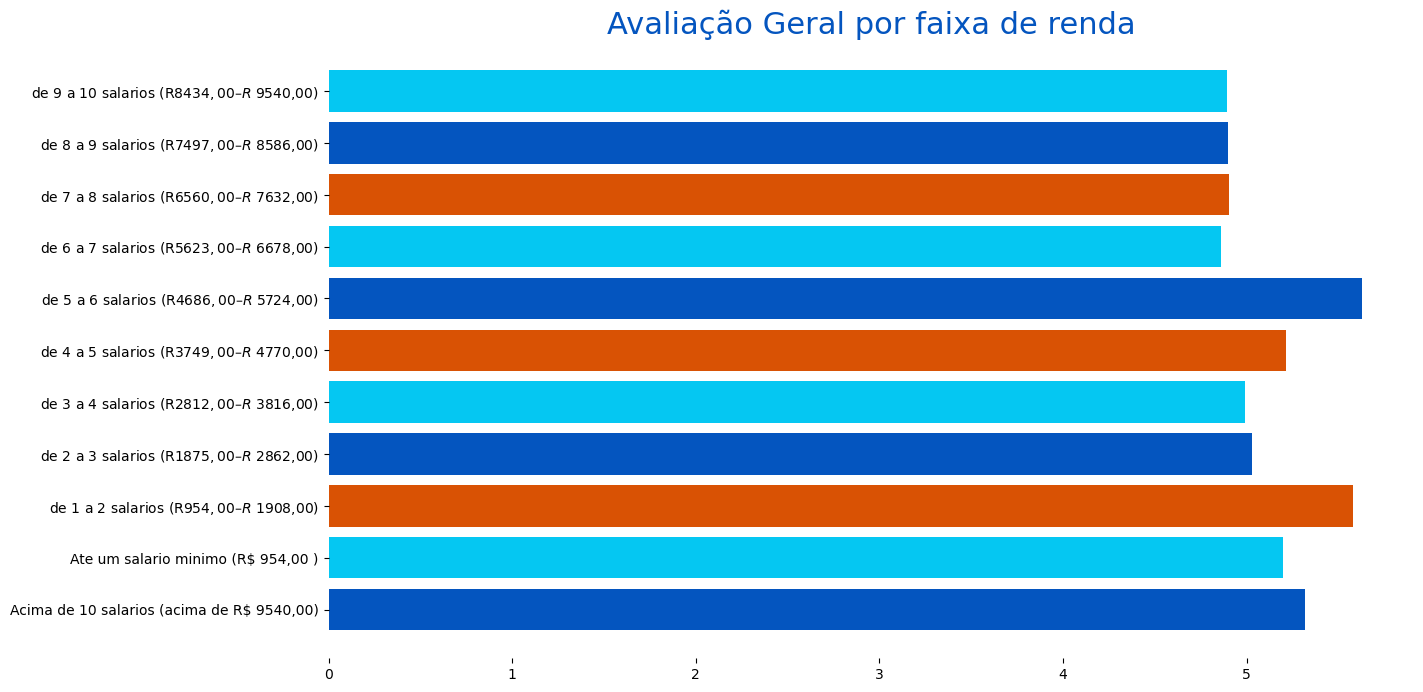

In [59]:
plt.figure(figsize=(14,8))
plt.barh(aval_renda['faixa_renda'], aval_renda['aval_geral'], color=my_palette)
plt.title('Avaliação Geral por faixa de renda', color='#0455BF', fontsize=22) 
plt.gca().grid(visible=False) 
plt.box(False)
plt.savefig('grafico_avaliacao_renda.png', transparent=True)

plt.show()

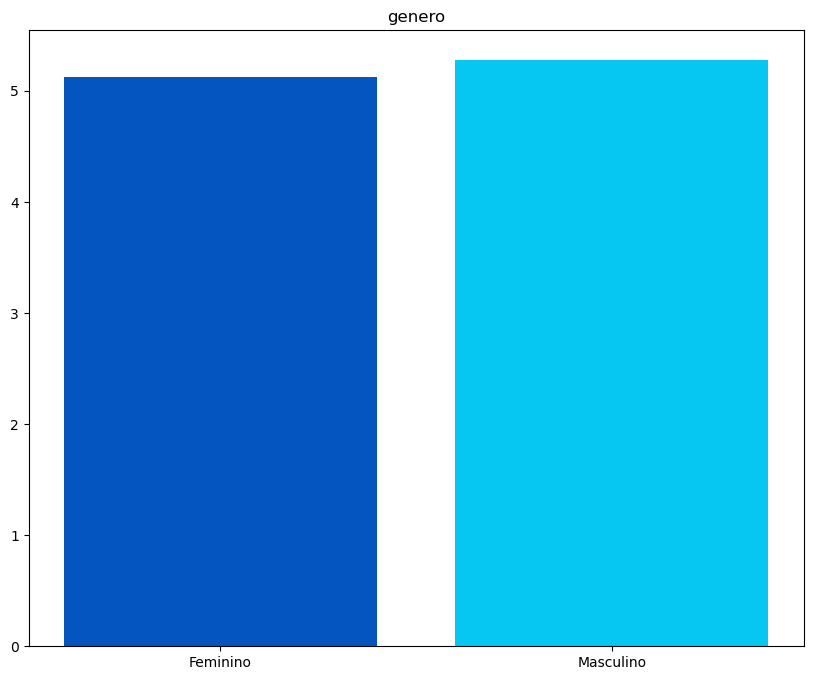

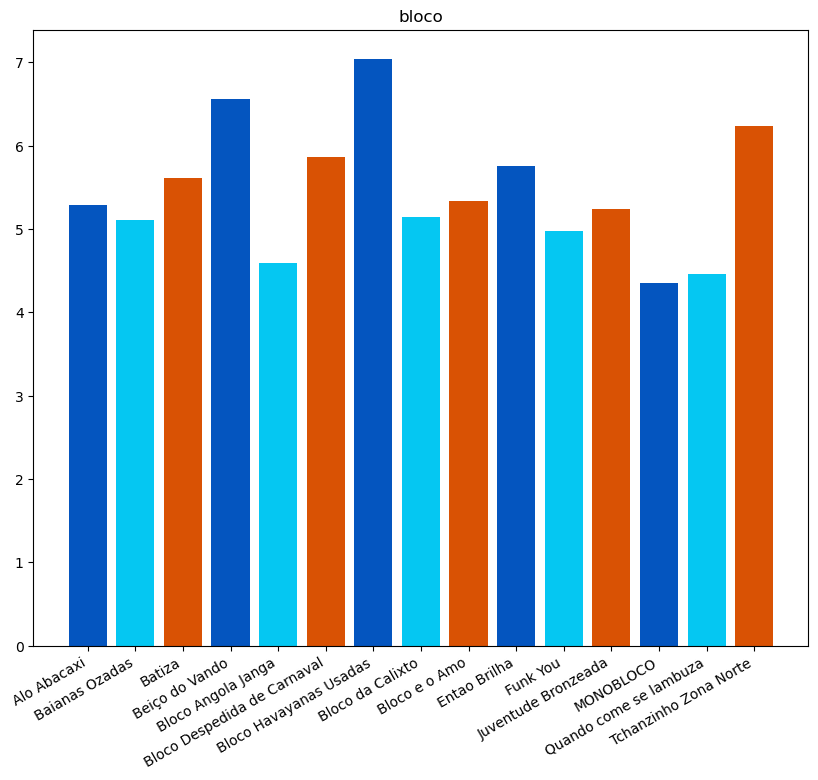

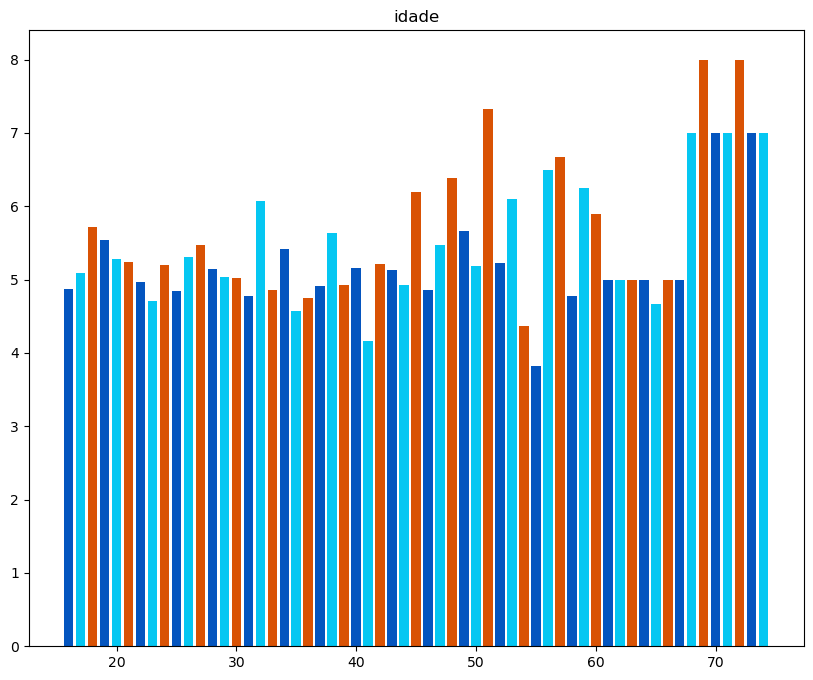

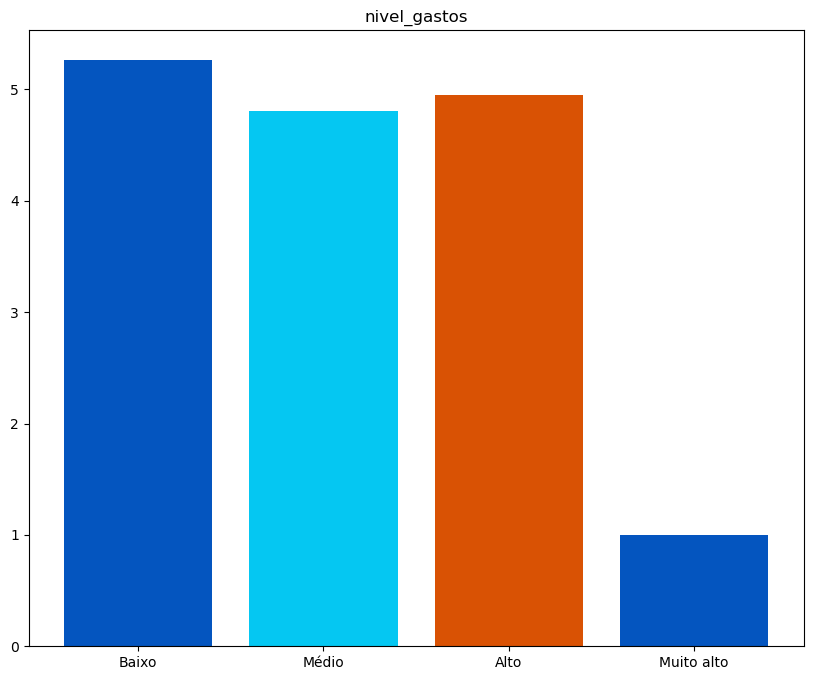

In [60]:
colunas = ['genero', 'bloco', 'idade', 'nivel_gastos']
for coluna in colunas:
    df2 = df.groupby(coluna, as_index=False).agg({'aval_geral':'mean'})
    plt.figure(figsize=(10,8))
    plt.bar(df2[coluna], df2['aval_geral'], color=my_palette)
    if coluna == 'bloco':
        plt.xticks(rotation=30, ha='right')
    plt.title(coluna)
    plt.show()

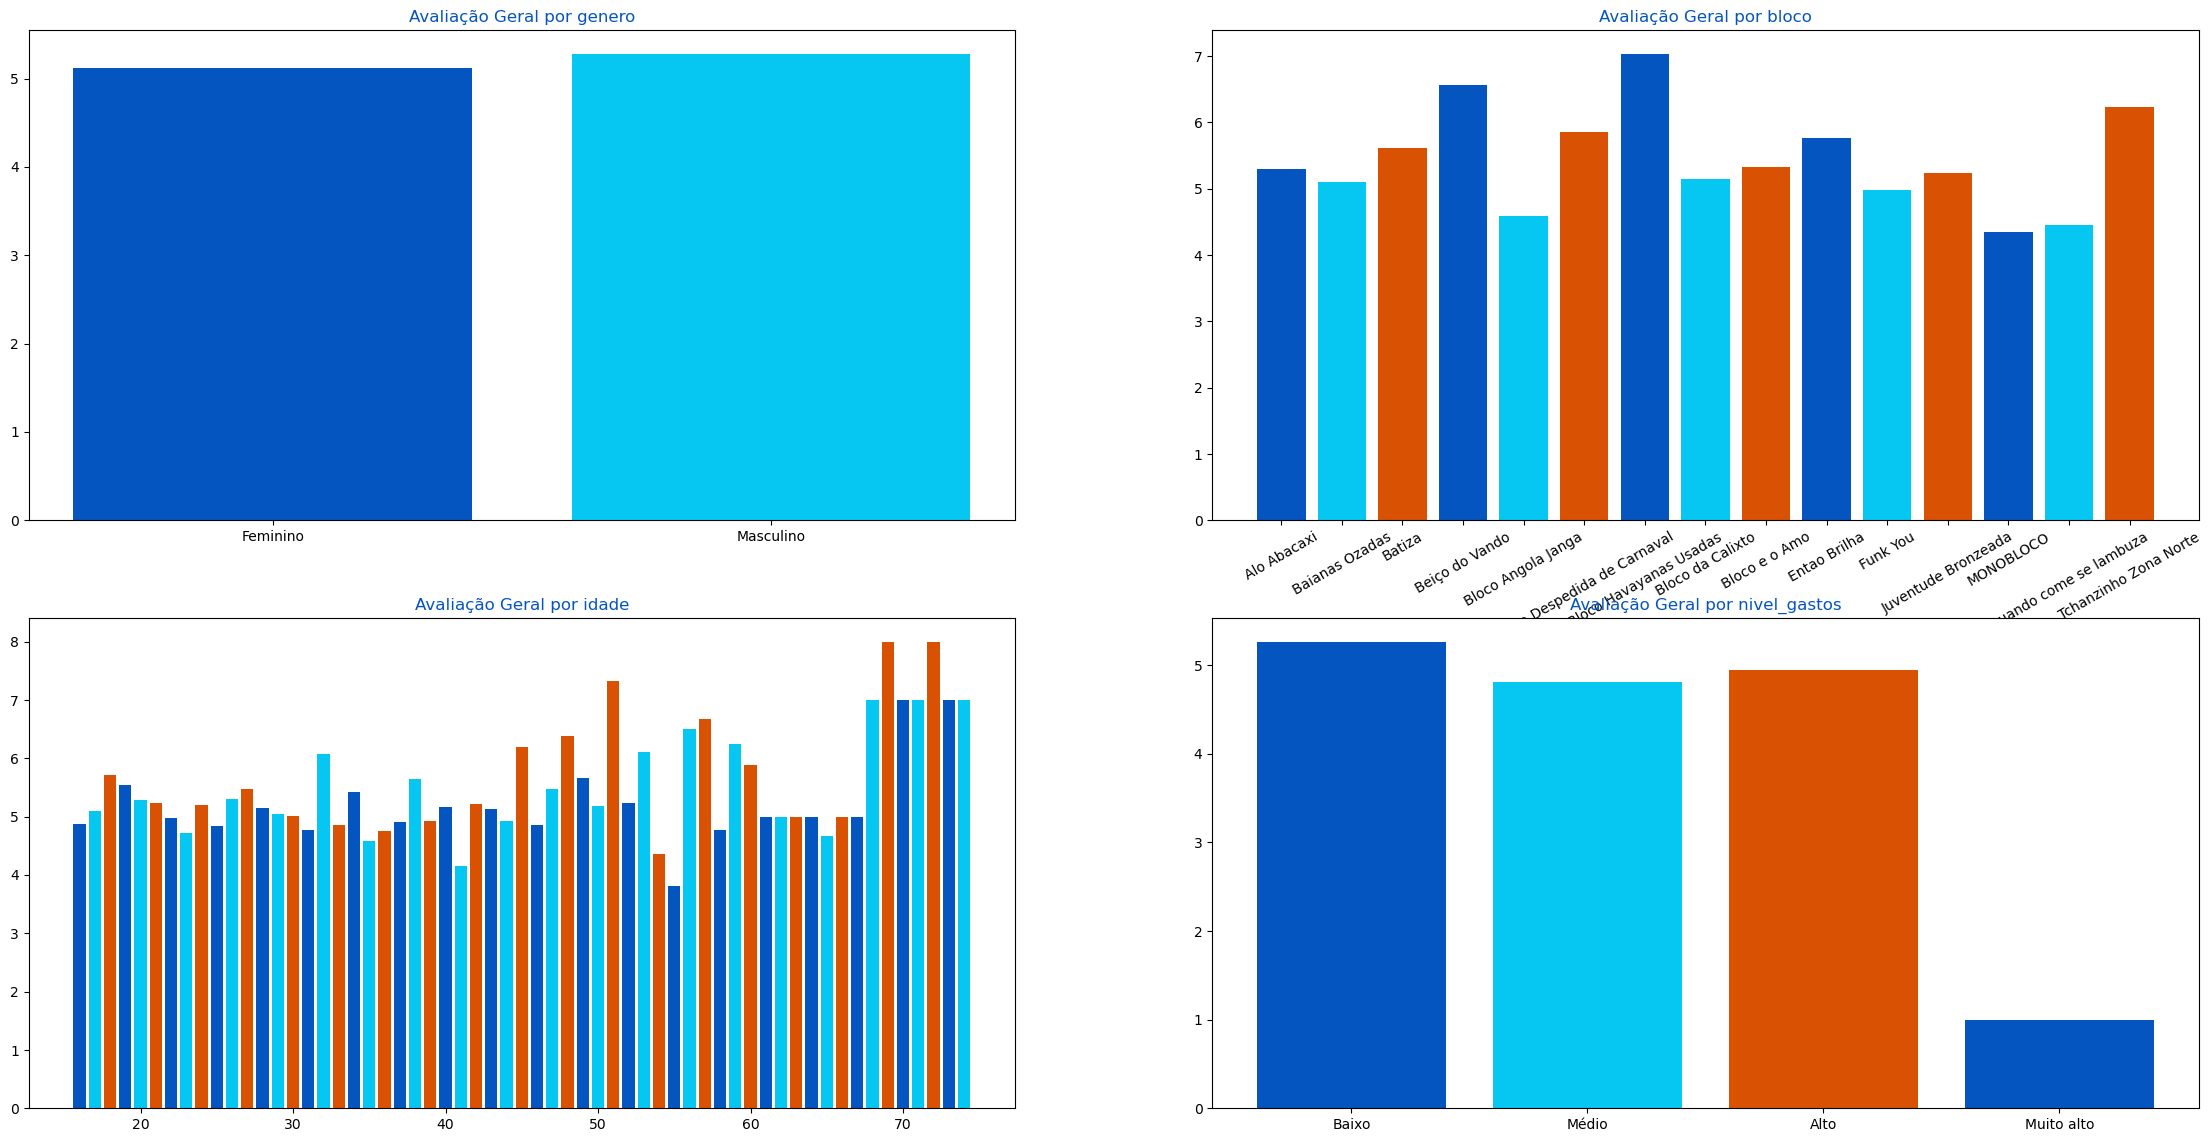

In [61]:
colunas=['genero', 'bloco', 'idade', 'nivel_gastos']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(28, 14)) 



for i, coluna in enumerate(colunas):
    row=i//2
    col=i%2
    df2=df.groupby(coluna, as_index=False).agg({'aval_geral':'mean'})
    axs[row, col].bar(df2[coluna], df2['aval_geral'], color=my_palette) 
    if coluna=='bloco':
        axs[row, col].tick_params(axis='x', rotation=30)
    axs[row, col].set_title('Avaliação Geral por {}'.format(coluna), color='#0455BF')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('grafico_avaliacao_4.png', transparent=True)
plt.show()

**FATO INTERESSANTE**: A avaliação de pessoas na faixa dos 70 anos parece ser acima da média, e as que gastaram valores absurdos, tiveram uma experiência abaixo da média.

In [62]:
df_3idade = df[df['idade']>65]
print('Média da avaliação geral de pessoas com mais de 65 anos: {:.2f}'.format(df_3idade['aval_geral'].mean()))
print()
print('Média da avaliação geral: {:.2f}'.format(df['aval_geral'].mean()))

Média da avaliação geral de pessoas com mais de 65 anos: 6.47

Média da avaliação geral: 5.19


In [63]:
df_gastos = df[df['nivel_gastos']=='Muito alto']
print('Média da avaliação geral de pessoas com gastos altos {:.2f}'.format(df_gastos['aval_geral'].mean()))
print()
print('Média da avaliação geral: {:.2f}'.format(df['aval_geral'].mean()))

Média da avaliação geral de pessoas com gastos altos 1.00

Média da avaliação geral: 5.19


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   index                       1581 non-null   int64   
 1   Unnamed: 0                  1581 non-null   int64   
 2   morador                     1581 non-null   object  
 3   numero_controle             1581 non-null   int64   
 4   bloco                       1581 non-null   object  
 5   bloco_classificacao         1581 non-null   object  
 6   dt_visita                   1581 non-null   object  
 7   dt_termino                  1581 non-null   object  
 8   tempo_total_entrev          1581 non-null   object  
 9   idade                       1581 non-null   int64   
 10  pais                        1581 non-null   object  
 11  estado                      1581 non-null   object  
 12  cidade                      1581 non-null   object  
 13  bairro_bh         

In [70]:
# revised salary groups
salary_groups = ['Até um salário mínimo (R$ 954,00)',
                 'De 1 a 2 salários (R$ 954,00 - R$ 1.908,00)',
                 'De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)',
                 'De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)',
                 'Acima de 8 salários (acima de R$ 7.632,00)',
                 'Não sei',
                 'Prefiro não responder']

# create a dictionary mapping original salary ranges to revised salary groups
salary_map = {'Ate um salario minimo (R$ 954,00 )': salary_groups[0],
              'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': salary_groups[1],
              'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': salary_groups[2],
              'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': salary_groups[2],
              'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': salary_groups[3],
              'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': salary_groups[3],
              'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': salary_groups[3],
              'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': salary_groups[4],
              'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': salary_groups[4],
              'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': salary_groups[4],
              'Acima de 10 salarios (acima de R$ 9540,00)': salary_groups[4]}

# apply the mapping to the "faixa_renda" column
df['faixa_renda'] = df['faixa_renda'].map(salary_map)

In [71]:
df.to_csv('df_atual.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   index                       1581 non-null   int64   
 1   Unnamed: 0                  1581 non-null   int64   
 2   morador                     1581 non-null   object  
 3   numero_controle             1581 non-null   int64   
 4   bloco                       1581 non-null   object  
 5   bloco_classificacao         1581 non-null   object  
 6   dt_visita                   1581 non-null   object  
 7   dt_termino                  1581 non-null   object  
 8   tempo_total_entrev          1581 non-null   object  
 9   idade                       1581 non-null   int64   
 10  pais                        1581 non-null   object  
 11  estado                      1581 non-null   object  
 12  cidade                      1581 non-null   object  
 13  bairro_bh         